In [7]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load covid cases dataset

covid_cases_df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
# # convert date to standard format
covid_cases_df['submission_date'] = pd.to_datetime(covid_cases_df['submission_date'])
# covid_cases_df = covid_cases_df.sort_values(by=['submission_date'])
covid_cases_df.sort_values(by=['state', 'submission_date']).tail(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
13615,2022-05-09,WY,156745,123664.0,33081.0,0,0.0,1814,1814.0,0.0,0,0.0,05/10/2022 01:23:16 PM,Agree,Agree
13750,2022-05-10,WY,157031,123889.0,33142.0,286,61.0,1817,1817.0,0.0,3,0.0,05/11/2022 01:51:16 PM,Agree,Agree
47119,2022-05-11,WY,157031,123889.0,33142.0,0,0.0,1817,1817.0,0.0,0,0.0,05/12/2022 01:16:14 PM,Agree,Agree
13664,2022-05-12,WY,157031,123889.0,33142.0,0,0.0,1817,1817.0,0.0,0,0.0,05/13/2022 01:28:57 PM,Agree,Agree
49103,2022-05-13,WY,157031,123889.0,33142.0,0,0.0,1817,1817.0,0.0,0,0.0,05/14/2022 01:28:26 PM,Agree,Agree


In [9]:
covid_cases_df.nunique()

submission_date      843
state                 60
tot_cases          37945
conf_cases         22999
prob_cases         16590
new_case            7586
pnew_case           2973
tot_death          16950
conf_death         12686
prob_death          3884
new_death            505
pnew_death           320
created_at          1898
consent_cases          2
consent_deaths         2
dtype: int64

In [10]:
covid_cases_df.rename(columns = {'submission_date':'date', 
                                 'tot_cases':'total_cases_cum', 
                                 'conf_cases': 'conf_cases_cum',
                                 'tot_death':'total_death_cum', 
                                 'conf_death': 'conf_death_cum',
                                }, 
                      inplace = True)
covid_cases_df = covid_cases_df.set_index('date')
covid_cases_df.info()
#  Covid cases dataset consists of #cases, #deaths and state in the date range from 01/22/2020 till 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50580 entries, 2021-12-01 to 2021-11-06
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            50580 non-null  object 
 1   total_cases_cum  50580 non-null  int64  
 2   conf_cases_cum   28012 non-null  float64
 3   prob_cases       27940 non-null  float64
 4   new_case         50580 non-null  int64  
 5   pnew_case        46878 non-null  float64
 6   total_death_cum  50580 non-null  int64  
 7   conf_death_cum   27567 non-null  float64
 8   prob_death       27567 non-null  float64
 9   new_death        50580 non-null  int64  
 10  pnew_death       46910 non-null  float64
 11  created_at       50580 non-null  object 
 12  consent_cases    42145 non-null  object 
 13  consent_deaths   42993 non-null  object 
dtypes: float64(6), int64(4), object(4)
memory usage: 5.8+ MB


In [11]:
# Analyze COVID19 datasets of two states

# MT - Montana
# MN - Minnesota

stateMontana = 'MT'
stateMinnesota = 'MN'

columns_list = ['state', 'total_cases_cum', 'total_death_cum', 'new_case', 'new_death']
covid_cases_for_MT = covid_cases_df.loc[:, columns_list]
covid_cases_for_MT = covid_cases_for_MT[covid_cases_df['state'].isin([stateMontana])]
covid_cases_for_MT.rename(columns = {'total_cases_cum':'MT_total_cases_cum', 
#                                      'conf_cases_cum': 'MT_conf_cases_cum',
                                     'total_death_cum':'MT_total_death_cum', 
#                                      'conf_death_cum': 'MT_conf_death_cum',
                                    }, 
                          inplace = True)

# sort the data by date 
covid_cases_for_MT = covid_cases_for_MT.sort_values(by=['date'])

# propagates last valid observation forward 
# covid_cases_for_MT.fillna(method='ffill', inplace=True)
covid_cases_for_MT.fillna(0, inplace=True)
covid_cases_for_MT = covid_cases_for_MT.drop(['state'], axis=1)

# subtract the consecutive rows to get the value for a particular day before you start analyzing the data.
covid_cases_for_MT['MT_total_cases'] = (covid_cases_for_MT['MT_total_cases_cum'] - covid_cases_for_MT['MT_total_cases_cum'].shift(1))
# covid_cases_for_MT['MT_conf_cases'] = covid_cases_for_MT['MT_conf_cases_cum'] - covid_cases_for_MT['MT_conf_cases_cum'].shift(1)
covid_cases_for_MT['MT_total_death'] = (covid_cases_for_MT['MT_total_death_cum'] - covid_cases_for_MT['MT_total_death_cum'].shift(1))
# covid_cases_for_MT['MT_conf_death'] = covid_cases_for_MT['MT_conf_death_cum'] - covid_cases_for_MT['MT_conf_death_cum'].shift(1)
covid_cases_for_MT.iloc[0, 4] = covid_cases_for_MT.iloc[0, 0]
covid_cases_for_MT.iloc[0, 5] = covid_cases_for_MT.iloc[0, 1]
# covid_cases_for_MT['MT_total_cases'] = covid_cases_for_MT['MT_total_cases'].astype('int64')
# covid_cases_for_MT['MT_total_death'] = covid_cases_for_MT['MT_total_death'].astype('int64')
# covid_cases_for_MT.iloc[0, 7] = covid_cases_for_MT.iloc[0, 3]

covid_cases_for_MT.tail()

,MT_total_cases_cum,MT_total_death_cum,new_case,new_death,MT_total_cases,MT_total_death
date,,,,,,
2022-05-09,274598,3378,0,0,0.0,0.0
2022-05-10,274598,3378,0,0,0.0,0.0
2022-05-11,274598,3378,0,0,0.0,0.0
2022-05-12,274598,3378,0,0,0.0,0.0
2022-05-13,275113,3381,515,3,515.0,3.0


In [12]:
covid_cases_for_MT.head()

,MT_total_cases_cum,MT_total_death_cum,new_case,new_death,MT_total_cases,MT_total_death
date,,,,,,
2020-01-22,0,0,0,0,0.0,0.0
2020-01-23,0,0,0,0,0.0,0.0
2020-01-24,0,0,0,0,0.0,0.0
2020-01-25,0,0,0,0,0.0,0.0
2020-01-26,0,0,0,0,0.0,0.0


In [13]:
# Check if our total cases / death coulmn match with new cases / death colum
print((covid_cases_for_MT['MT_total_cases'] == covid_cases_for_MT['new_case']).value_counts())
covid_cases_for_MT.query('MT_total_cases != new_case')

# covid_cases_for_MT.query('MT_total_death != new_death')
# print((covid_cases_for_MT['MT_total_death'] == covid_cases_for_MT['new_death']).value_counts())

True     841
False      2
dtype: int64


,MT_total_cases_cum,MT_total_death_cum,new_case,new_death,MT_total_cases,MT_total_death
date,,,,,,
2021-04-09,105974,1521,152,1,224.0,27.0
2022-03-04,271030,3204,330,1,2080.0,1.0


##### Found out that there are two rows in which values do not match
##### In that case, our total columns are right
##### So dropping new case and new death columns

In [14]:
covid_cases_for_MT.drop(['new_case', 'new_death'], axis=1, inplace=True)

In [15]:
covid_cases_for_MT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 843 entries, 2020-01-22 to 2022-05-13
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MT_total_cases_cum  843 non-null    int64  
 1   MT_total_death_cum  843 non-null    int64  
 2   MT_total_cases      843 non-null    float64
 3   MT_total_death      843 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 32.9 KB


In [16]:
columns_list = ['state', 'total_cases_cum', 'total_death_cum'] #, 'conf_cases_cum', 'conf_death_cum']
covid_cases_for_MN = covid_cases_df.loc[:, columns_list]
covid_cases_for_MN = covid_cases_for_MN[covid_cases_df['state'].isin([stateMinnesota])]
covid_cases_for_MN.rename(columns = {'total_cases_cum':'MN_total_cases_cum', 
#                                      'conf_cases_cum': 'MN_conf_cases_cum',
                                     'total_death_cum':'MN_total_death_cum', 
#                                      'conf_death_cum': 'MN_conf_death_cum',
                                    }, 
                          inplace = True)

# sort the data by date 
covid_cases_for_MN = covid_cases_for_MN.sort_values(by=['date'])

# covid_cases_for_MT.info()

# propagates last valid observation forward 
# covid_cases_for_MN.fillna(method='ffill', inplace=True)
covid_cases_for_MN.fillna(0, inplace=True)

covid_cases_for_MN = covid_cases_for_MN.drop(['state'], axis=1)

# subtract the consecutive rows to get the value for a particular day before you start analyzing the data.
covid_cases_for_MN['MN_total_cases'] = covid_cases_for_MN['MN_total_cases_cum'] - covid_cases_for_MN['MN_total_cases_cum'].shift(1)
# covid_cases_for_MN['MN_conf_cases'] = covid_cases_for_MN['MN_conf_cases_cum'] - covid_cases_for_MN['MN_conf_cases_cum'].shift(1)
covid_cases_for_MN['MN_total_death'] = covid_cases_for_MN['MN_total_death_cum'] - covid_cases_for_MN['MN_total_death_cum'].shift(1)
# covid_cases_for_MN['MN_conf_death'] = covid_cases_for_MN['MN_conf_death_cum'] - covid_cases_for_MN['MN_conf_death_cum'].shift(1)
covid_cases_for_MN.iloc[0, 2] = covid_cases_for_MN.iloc[0, 0]
covid_cases_for_MN.iloc[0, 3] = covid_cases_for_MN.iloc[0, 1]
# covid_cases_for_MN.iloc[0, 6] = covid_cases_for_MN.iloc[0, 2]
# covid_cases_for_MN.iloc[0, 7] = covid_cases_for_MN.iloc[0, 3]

covid_cases_for_MN.tail()

,MN_total_cases_cum,MN_total_death_cum,MN_total_cases,MN_total_death
date,,,,
2022-05-09,1466615,12809,2660.0,4.0
2022-05-10,1471731,12814,5116.0,5.0
2022-05-11,1473521,12826,1790.0,12.0
2022-05-12,1476133,12837,2612.0,11.0
2022-05-13,1479047,12849,2914.0,12.0


In [17]:
state_covid_cases_df = pd.concat([covid_cases_for_MT, covid_cases_for_MN], axis=1)

### Mandatory tasks to be performed on your assigned COVID19 dataset from column B:

#### 1. Clean your dataset (remove missing values, sanitize data, etc.). Remove any outliers (except 0s) using the Tukey’s rule from class using the default values as in class. Report what you found (number of outliers). Comment on your findings both for data cleaning (what issues you found, how you dealt with them) and outlier detection. This will be 10% of the project grade.

##### Remove missing values

In [18]:
state_covid_cases_df = state_covid_cases_df.dropna(how='any')
state_covid_cases_df.tail()

,MT_total_cases_cum,MT_total_death_cum,MT_total_cases,MT_total_death,MN_total_cases_cum,MN_total_death_cum,MN_total_cases,MN_total_death
date,,,,,,,,
2022-05-09,274598,3378,0.0,0.0,1466615,12809,2660.0,4.0
2022-05-10,274598,3378,0.0,0.0,1471731,12814,5116.0,5.0
2022-05-11,274598,3378,0.0,0.0,1473521,12826,1790.0,12.0
2022-05-12,274598,3378,0.0,0.0,1476133,12837,2612.0,11.0
2022-05-13,275113,3381,515.0,3.0,1479047,12849,2914.0,12.0


##### Remove outliers using Tukey's rule 

In [19]:
def remove_outliers(data, column):
    
    column_data = data[column]
    
    n = len(column_data)
    # First quartile
    q1 = np.percentile(column_data, 25)
    print("Q1:", q1)
    # Third quartile
    q3 = np.percentile(column_data, 75)

    print("Q3:", q3)
    # Inter-Quartile Range
    iqr = q3 - q1
    
    width = 1.5 * iqr
    
    min_value = q1 - width
    max_value = q3 + width      
    
    print("Q1 − 1.5*IQR :", min_value)
    print("Q3 + 1.5*IQR :", max_value)
    
    # filter to find the outliers using Tukey's rule
    filter_ = (column_data < min_value) | (column_data > max_value)
    cleaned_data = data.loc[~filter_]    
    
    outliers = data.loc[filter_]
    plt.figure(figsize=(15, 8))
    plt.scatter(data.index, data[column], c='b')
    plt.scatter(outliers.index, outliers[column], label='outliers', c='r')
    plt.legend(loc='upper right')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Outliers', fontsize=14)
    plt.title('Distribution of outliers in data', fontsize=14)
    plt.show()
    
    return cleaned_data

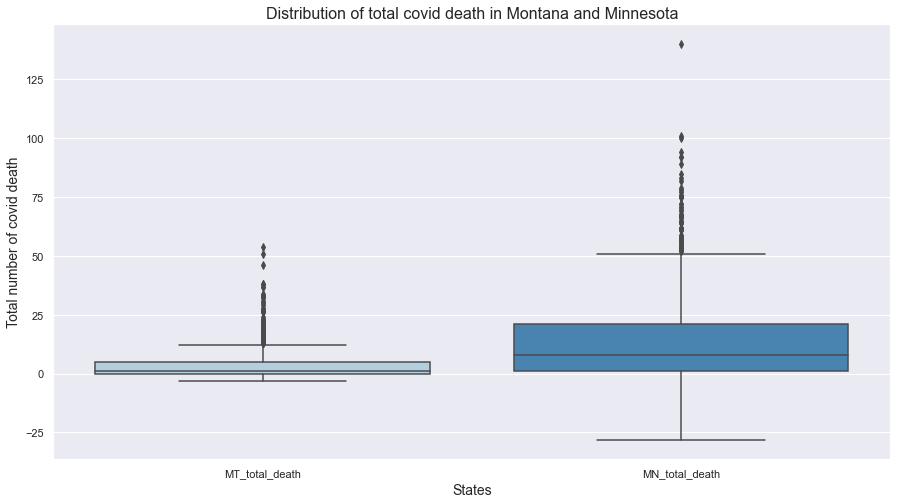

In [20]:
df_plot1 = pd.DataFrame(data = state_covid_cases_df, columns = ['MT_total_death','MN_total_death'])

sns.set(rc = {'figure.figsize':(15, 8)})
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_plot1), palette="Blues")
# boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df_plot1), marker="o", alpha=0.3, color="black", order=['MT_total_death','MN_total_death'])
boxplot.axes.set_title("Distribution of total covid death in Montana and Minnesota", fontsize=16)
boxplot.set_xlabel("States", fontsize=14)
boxplot.set_ylabel("Total number of covid death", fontsize=14)
plt.show()

As we can see our data for MT and MN has some outliers. We will remove it using Tukey's rule

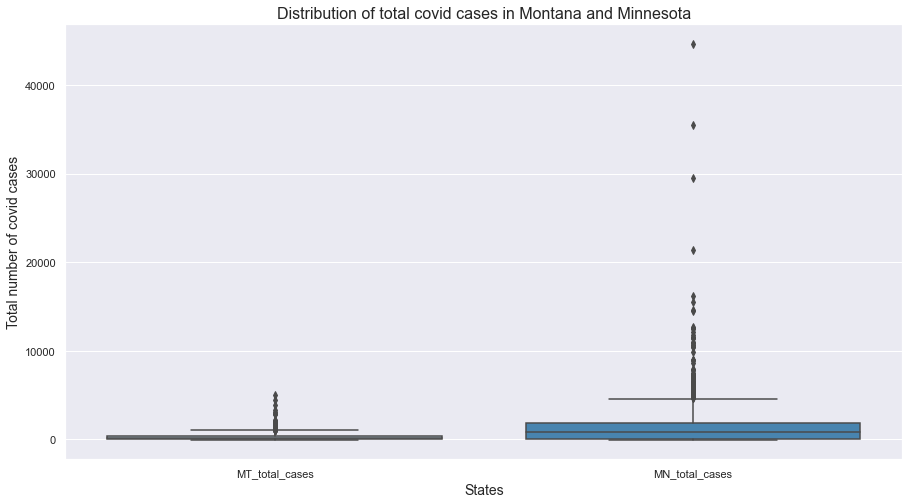

In [21]:
# figure1 = sns.boxplot(y=state_covid_cases_df['MT_total_death'], linewidth=1.5)

df_plot1 = pd.DataFrame(data = state_covid_cases_df, columns = ['MT_total_cases','MN_total_cases'])
sns.set(rc = {'figure.figsize':(15, 8)})
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_plot1), palette="Blues")
boxplot.axes.set_title("Distribution of total covid cases in Montana and Minnesota", fontsize=16)
boxplot.set_xlabel("States", fontsize=14)
boxplot.set_ylabel("Total number of covid cases", fontsize=14)
plt.show()

As we can see our data for MT and MN has some outliers. We will remove it using Tukey's rule

Q1: 0.0
Q3: 5.0
Q1 − 1.5*IQR : -7.5
Q3 + 1.5*IQR : 12.5


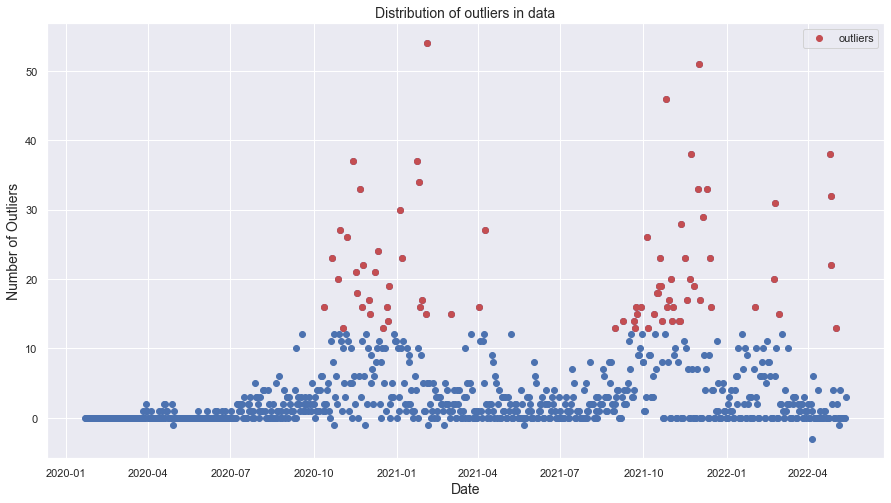

Number of outliers: 76


In [22]:
column = 'MT_total_death'
cleaned_data = remove_outliers(state_covid_cases_df, column)
print("Number of outliers:", len(state_covid_cases_df) - len(cleaned_data))
state_covid_cases_df = cleaned_data

Q1: 1.0
Q3: 17.0
Q1 − 1.5*IQR : -23.0
Q3 + 1.5*IQR : 41.0


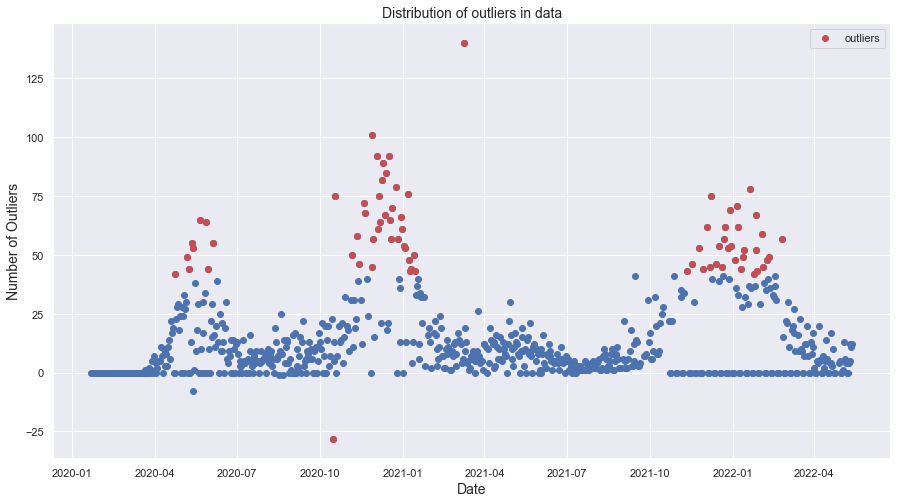

Number of outliers: 75


In [23]:
column = 'MN_total_death'
cleaned_data = remove_outliers(state_covid_cases_df, column)
print("Number of outliers:", len(state_covid_cases_df) - len(cleaned_data))
state_covid_cases_df = cleaned_data

Q1: 2.0
Q3: 230.25
Q1 − 1.5*IQR : -340.375
Q3 + 1.5*IQR : 572.625


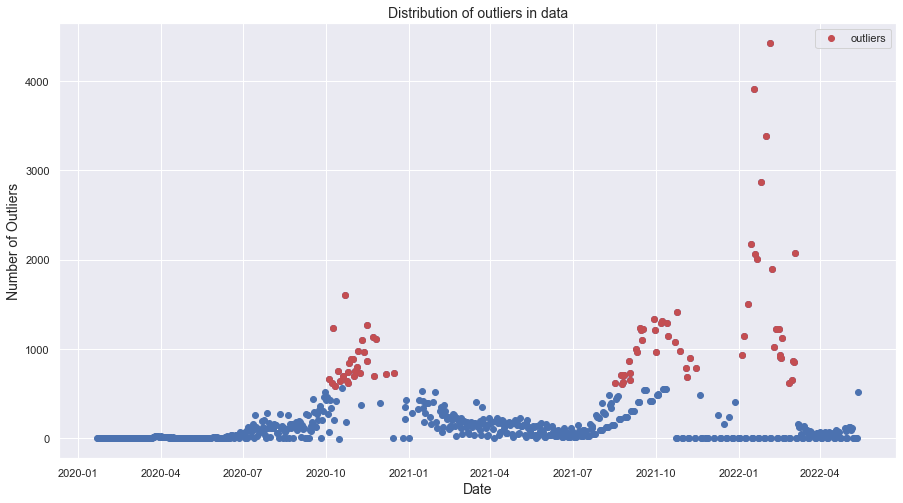

Number of outliers: 79


In [24]:
column = 'MT_total_cases'
cleaned_data = remove_outliers(state_covid_cases_df, column)
print("Number of outliers:", len(state_covid_cases_df) - len(cleaned_data))
state_covid_cases_df = cleaned_data

Q1: 0.0
Q3: 970.0
Q1 − 1.5*IQR : -1455.0
Q3 + 1.5*IQR : 2425.0


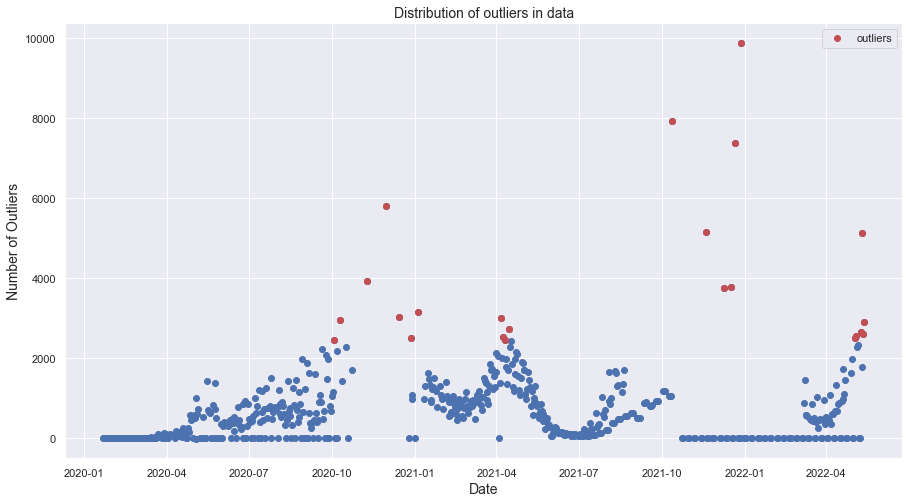

Number of outliers: 23


In [25]:
column = 'MN_total_cases'
cleaned_data = remove_outliers(state_covid_cases_df, column)
print("Number of outliers:", len(state_covid_cases_df) - len(cleaned_data))
state_covid_cases_df = cleaned_data

In [26]:
state_covid_cases_df.shape

(590, 8)

In [27]:
state_covid_cases_df.tail(40)

,MT_total_cases_cum,MT_total_death_cum,MT_total_cases,MT_total_death,MN_total_cases_cum,MN_total_death_cum,MN_total_cases,MN_total_death
date,,,,,,,,
2022-03-25,272397,3242,41.0,2.0,1427270,12589,483.0,7.0
2022-03-26,272397,3242,0.0,0.0,1427270,12589,0.0,0.0
2022-03-27,272397,3242,0.0,0.0,1427270,12589,0.0,0.0
2022-03-28,272454,3245,57.0,3.0,1427734,12602,464.0,13.0
2022-03-29,272509,3246,55.0,1.0,1428704,12610,970.0,8.0
2022-03-30,272543,3246,34.0,0.0,1429051,12621,347.0,11.0
2022-03-31,272555,3247,12.0,1.0,1429550,12638,499.0,17.0
2022-04-01,272621,3249,66.0,2.0,1430089,12640,539.0,2.0
2022-04-02,272621,3249,0.0,0.0,1430089,12640,0.0,0.0


In [28]:
# Number of negative values after precessing
state_covid_cases_df.where(state_covid_cases_df < 0).count()

MT_total_cases_cum    0
MT_total_death_cum    0
MT_total_cases        3
MT_total_death        7
MN_total_cases_cum    0
MN_total_death_cum    0
MN_total_cases        2
MN_total_death        3
dtype: int64

##### The negative values present in the dataset should be replaced with zero values as negative values for number of cases and deaths does not make sense. These fifteen values are replaced with zeros

In [29]:
state_covid_cases_df.MT_total_cases = state_covid_cases_df.MT_total_cases.mask(state_covid_cases_df.MT_total_cases.lt(0),0)
state_covid_cases_df.where(state_covid_cases_df < 0).count()

MT_total_cases_cum    0
MT_total_death_cum    0
MT_total_cases        0
MT_total_death        7
MN_total_cases_cum    0
MN_total_death_cum    0
MN_total_cases        2
MN_total_death        3
dtype: int64

In [30]:
state_covid_cases_df.MT_total_death = state_covid_cases_df.MT_total_death.mask(state_covid_cases_df.MT_total_death.lt(0),0)
state_covid_cases_df.where(state_covid_cases_df < 0).count()

MT_total_cases_cum    0
MT_total_death_cum    0
MT_total_cases        0
MT_total_death        0
MN_total_cases_cum    0
MN_total_death_cum    0
MN_total_cases        2
MN_total_death        3
dtype: int64

In [31]:
state_covid_cases_df.MN_total_cases = state_covid_cases_df.MN_total_cases.mask(state_covid_cases_df.MN_total_cases.lt(0),0)
state_covid_cases_df.where(state_covid_cases_df < 0).count()

MT_total_cases_cum    0
MT_total_death_cum    0
MT_total_cases        0
MT_total_death        0
MN_total_cases_cum    0
MN_total_death_cum    0
MN_total_cases        0
MN_total_death        3
dtype: int64

In [32]:
state_covid_cases_df.MN_total_death = state_covid_cases_df.MN_total_death.mask(state_covid_cases_df.MN_total_death.lt(0),0)
state_covid_cases_df.where(state_covid_cases_df < 0).count()

MT_total_cases_cum    0
MT_total_death_cum    0
MT_total_cases        0
MT_total_death        0
MN_total_cases_cum    0
MN_total_death_cum    0
MN_total_cases        0
MN_total_death        0
dtype: int64

In [33]:
state_covid_cases_df.to_csv('cleaned_covid_cases_and_death_data.csv') 

#### 2. Solve the required inferences below for your COVID19 datasets (Cases dataset consists of the cumulative #cases and #deaths while the Vaccinations dataset consists of #vaccines administered information). The datasets provided contain cumulative data and hence you should first calculate daily stats for each relevant column. Unless otherwise stated, always use daily stats for the purpose of reporting any inference/observation. Only use tools/tests learned in class. Show your work clearly and comment on results as appropriate. This will be 60% of the project grade, with 12% for each of the five tasks below. Use the Cases dataset for tasks a, b and c, and the Vaccinations dataset for tasks d and e.

#### a. In this step, we want to check, for both the states assigned to your group, how the mean of monthly COVID19 stats has changed between Feb 2021 and March 2021. Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different for Feb’21 and March’21 in the two states. That is, we are checking, for each state separately, whether the mean of daily cases and the mean of daily deaths for Feb’21 is different from the corresponding mean of daily values for March’21. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases in both states separately. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests for Wald’s, Z-test, and t-test by computing the sample mean of daily values from Feb’21 and using that as a guess for mean of daily values for March’21; here, your sample data for computing sample mean will be the 28 daily values in Feb’21 whereas your sample data for running the test will be the 31 daily values of March’21. Then, repeat with the two-sample version of Wald’s and two-sample unpaired t-test (here, your two samples will be the 28 values of Feb’21 and the 31 values of March’21). Use α=0.05 for all. For t-test, the threshold to check against is tn-1,α/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the uncorrected sample standard deviation (n in the denominator instead of n-1) of the entire COVID19 dataset you have for each state as the true sigma value.

In [34]:
from datetime import datetime

state_covid_cases_df.index = pd.to_datetime(state_covid_cases_df.index)

feb_month_data = state_covid_cases_df[(state_covid_cases_df.index >= '2021-02-01') & (state_covid_cases_df.index <= '2021-02-28')]
print("February data:", len(feb_month_data))

mar_month_data = state_covid_cases_df[(state_covid_cases_df.index >= '2021-03-01') & (state_covid_cases_df.index <= '2021-03-31')]
print("March data:", len(mar_month_data))

February data: 26
March data: 29


### Montana

In [35]:
# How the mean of monthly COVID19 stats has changed between Feb 2021 and March 2021

feb_month_data_mean_cases_MT = feb_month_data['MT_total_cases'].mean()
feb_month_data_mean_death_MT = feb_month_data['MT_total_death'].mean()

mar_month_data_mean_cases_MT = mar_month_data['MT_total_cases'].mean()
mar_month_data_mean_death_MT = mar_month_data['MT_total_death'].mean()

### Wald's Test for MT covid death

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [36]:
# def wald_2_sample_test(mean1, mean2, data1, data2):
#     denominator = np.sqrt(mean1/len(data1) + mean2/len(data2))
#     return (mean1 - mean2) / denominator

def wald_one_sample_test(theta_hat, theta_0, data):
    # theta_hat is the estimator for theta
    # theta_0 is the actual mean value
    
    se_hat_theta = np.sqrt(theta_hat/len(data))
    return np.abs((theta_hat - theta_0) / se_hat_theta)

In [37]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_onesample_death_MT = wald_one_sample_test(feb_month_data_mean_death_MT, 
                                               mar_month_data_mean_death_MT, 
                                               feb_month_data)
print("Sample mean death for feb month:", feb_month_data_mean_death_MT)
print("Sample mean death for mar month:", mar_month_data_mean_death_MT)
print("W:", wald_onesample_death_MT)

# alpha given 0.05
if wald_onesample_death_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 2.1923076923076925
Sample mean death for mar month: 2.103448275862069
W: 0.3299411905963097
Accept the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Wald's Test for MT covid cases

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [31]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_onesample_cases_MT = wald_one_sample_test(feb_month_data_mean_cases_MT, 
                                               mar_month_data_mean_cases_MT, 
                                               feb_month_data)
print("Sample mean cases for feb month:", feb_month_data_mean_cases_MT)
print("Sample mean cases for mar month:", mar_month_data_mean_cases_MT)
print("W:", wald_onesample_cases_MT)

if wald_onesample_cases_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 202.5
Sample mean cases for mar month: 148.58620689655172
W: 19.31852871948626
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Z Test for MT covid death

#### Sample standard deviation is known from the data, and number of samples is high (the mean is asymptotically normal). Hence Z-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [32]:
def z_test(sample_mean, mu_0, data, coluMT):
    
    mean_ = data[coluMT].mean()
    variance = np.sum(np.square(data[coluMT] - mean_)) / len(data)
    return np.abs((sample_mean - mu_0) / (np.sqrt(variance)/np.sqrt(len(data))))

In [33]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

z_death_MT = z_test(feb_month_data_mean_death_MT, 
                    mar_month_data_mean_death_MT, 
                    state_covid_cases_df,
                    'MT_total_death')
print("Sample mean death for feb month:", feb_month_data_mean_death_MT)
print("Sample mean death for mar month:", mar_month_data_mean_death_MT)
print("Z:", z_death_MT)

if z_death_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 2.1923076923076925
Sample mean death for mar month: 2.103448275862069
Z: 0.9925760422917541
Accept the Null hypothesis


Z statistic is less than Z_(alpha/2), so we accept the null hypothesis

### Z Test for MT covid cases

#### Sample standard deviation is known from the data, and number of samples is high (the mean is asymptotically normal). Hence Z-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [34]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

z_cases_MT = z_test(feb_month_data_mean_cases_MT, 
                    mar_month_data_mean_cases_MT, 
                    state_covid_cases_df,
                    'MT_total_cases')
print("Sample mean cases for feb month:", feb_month_data_mean_cases_MT)
print("Sample mean cases for mar month:", mar_month_data_mean_cases_MT)
print("Z:", z_cases_MT)

if z_cases_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 202.5
Sample mean cases for mar month: 148.58620689655172
Z: 10.11618971404372
Reject the Null hypothesis


Z statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### T Test for MT covid death

#### the mean is asymptotically normal. t-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [35]:
def t_test(mean1, mean2, data, coluMT):
    
    uncorrected_sample_std = np.sum(np.square(data[coluMT] - mean1)) / len(data)
    return np.abs((mean1 - mean2) / (np.sqrt(uncorrected_sample_std)/np.sqrt(len(data))))

In [36]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

t_death_MT = t_test(feb_month_data_mean_death_MT, 
                    mar_month_data_mean_death_MT, 
                    feb_month_data,
                    'MT_total_death')
print("Sample mean death for feb month:", feb_month_data_mean_death_MT)
print("Sample mean death for mar month:", mar_month_data_mean_death_MT)
print("Alpha:", 0.05, ", n:", 26)
print("T:", t_death_MT)


if t_death_MT > 2.059539: # t_(n-1, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 2.1923076923076925
Sample mean death for mar month: 2.103448275862069
Alpha: 0.05 , n: 26
T: 0.27220405470995673
Accept the Null hypothesis


### T Test for MT covid cases

#### the mean is asymptotically normal. t-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [37]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

t_cases_MT = t_test(feb_month_data_mean_cases_MT, 
                    mar_month_data_mean_cases_MT, 
                    feb_month_data,
                    'MT_total_cases')
print("Sample mean cases for feb month:", feb_month_data_mean_cases_MT)
print("Sample mean cases for mar month:", mar_month_data_mean_cases_MT)
print("Alpha:", 0.05, ", n:", 26)
print("T:", t_cases_MT)

if t_cases_MT > 2.059539: # t_(n-1, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 202.5
Sample mean cases for mar month: 148.58620689655172
Alpha: 0.05 , n: 26
T: 3.30230309416593
Reject the Null hypothesis


### Wald's two sample test for MT covid death

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Here, we compare two samples feb data and march data. Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [38]:
def wald_two_sample_test(mean1, mean2, data1, data2):
    denominator = np.sqrt(mean1/len(data1) + mean2/len(data2))
    return np.abs(mean1 - mean2) / denominator

In [39]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_twosample_death_MT = wald_two_sample_test(feb_month_data_mean_death_MT, 
                                               mar_month_data_mean_death_MT, 
                                               feb_month_data,
                                               mar_month_data)
print("Sample mean death for feb month:", feb_month_data_mean_death_MT)
print("Sample mean death for mar month:", mar_month_data_mean_death_MT)
print("W:", wald_twosample_death_MT)

if wald_twosample_death_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 2.1923076923076925
Sample mean death for mar month: 2.103448275862069
W: 0.2243665520023155
Accept the Null hypothesis


Wald's statistic is less than Z_(alpha/2), so we accept the null hypothesis

### Wald's two sample test for MT covid cases

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Here, we compare two samples feb data and march data. Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [40]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_twosample_cases_MT = wald_two_sample_test(feb_month_data_mean_cases_MT, 
                                               mar_month_data_mean_cases_MT, 
                                               feb_month_data,
                                               mar_month_data)
print("Sample mean cases for feb month:", feb_month_data_mean_cases_MT)
print("Sample mean cases for mar month:", mar_month_data_mean_cases_MT)
print("W:", wald_twosample_cases_MT)

if wald_twosample_cases_MT > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 202.5
Sample mean cases for mar month: 148.58620689655172
W: 15.003792394225187
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Unpaired two sample T Test for MT covid death

#### Here, we compare two samples feb data and march data. the mean is asymptotically normal. t-test is applicable.

#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [41]:
def upaired_t_test(mean1, mean2, data1, data2, coluMT):
    
    uncorrected_sample_std1 = np.sum(np.square(data1[coluMT] - mean1)) / len(data1)
    uncorrected_sample_std2 = np.sum(np.square(data2[coluMT] - mean2)) / len(data2)
    return np.abs(mean1 - mean2) / np.sqrt(uncorrected_sample_std1/len(data1) + uncorrected_sample_std2/len(data2))

In [42]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

unpaired_t_death_MT = upaired_t_test(feb_month_data_mean_death_MT, 
                                     mar_month_data_mean_death_MT, 
                                     feb_month_data,
                                     mar_month_data,
                                     'MT_total_death')

print("Sample mean death for feb month:", feb_month_data_mean_death_MT)
print("Sample mean death for mar month:", mar_month_data_mean_death_MT)
print("Alpha:", 0.05, ", n+m-2:", 26 -1 + 29 - 1)
print("T:", unpaired_t_death_MT)


if unpaired_t_death_MT > 2.005746: # t_(n+m-2, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 2.1923076923076925
Sample mean death for mar month: 2.103448275862069
Alpha: 0.05 , n+m-2: 53
T: 0.1401015997350352
Accept the Null hypothesis


### Unpaired two sample T Test for MT covid cases

#### Here, we compare two samples feb data and march data. the mean is asymptotically normal. t-test is applicable.

#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [43]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

unpaired_t_cases_MT = upaired_t_test(feb_month_data_mean_cases_MT, 
                                     mar_month_data_mean_cases_MT, 
                                     feb_month_data,
                                     mar_month_data,
                                     'MT_total_cases')

print("Sample mean cases for feb month:", feb_month_data_mean_cases_MT)
print("Sample mean cases for mar month:", mar_month_data_mean_cases_MT)
print("Alpha:", 0.05, ", n+m-2:", 26 -1 + 29 - 1)
print("T:", unpaired_t_cases_MT)


if unpaired_t_cases_MT > 2.005746: # t_(n+m-2, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 202.5
Sample mean cases for mar month: 148.58620689655172
Alpha: 0.05 , n+m-2: 53
T: 2.358955563502015
Reject the Null hypothesis


### Minnesota

In [44]:
# How the mean of monthly COVID19 stats has changed between Feb 2021 and March 2021

feb_month_data_mean_cases = feb_month_data['MN_total_cases'].mean()
feb_month_data_mean_death = feb_month_data['MN_total_death'].mean()

mar_month_data_mean_cases = mar_month_data['MN_total_cases'].mean()
mar_month_data_mean_death = mar_month_data['MN_total_death'].mean()

### Wald's Test for MN covid death

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [45]:
# def wald_2_sample_test(mean1, mean2, data1, data2):
#     denominator = np.sqrt(mean1/len(data1) + mean2/len(data2))
#     return (mean1 - mean2) / denominator

def wald_one_sample_test(theta_hat, theta_0, data):
    # theta_hat is the estimator for theta
    # theta_0 is the actual mean value
    
    se_hat_theta = np.sqrt(theta_hat/len(data))
    return np.abs((theta_hat - theta_0) / se_hat_theta)

In [46]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_onesample_death_MN = wald_one_sample_test(feb_month_data_mean_death, 
                                               mar_month_data_mean_death, 
                                               feb_month_data)
print("Sample mean death for feb month:", feb_month_data_mean_death)
print("Sample mean death for mar month:", mar_month_data_mean_death)
print("W:", wald_onesample_death_MN)

if wald_onesample_death_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 9.653846153846153
Sample mean death for mar month: 7.9655172413793105
W: 2.7707257763569073
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Wald's Test for MN covid cases

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [47]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_onesample_cases_MN = wald_one_sample_test(feb_month_data_mean_cases, 
                                               mar_month_data_mean_cases, 
                                               feb_month_data)
print("Sample mean cases for feb month:", feb_month_data_mean_cases)
print("Sample mean cases for mar month:", mar_month_data_mean_cases)
print("W:", wald_onesample_cases_MN)

if wald_onesample_cases_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 828.8076923076923
Sample mean cases for mar month: 1133.9655172413793
W: 54.048581213448465
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Z Test for MN covid death

#### Sample standard deviation is known from the data, and number of samples is high (the mean is asymptotically normal). Hence Z-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [48]:
def z_test(sample_mean, mu_0, data, column):
    
    mean_ = data[column].mean()
    variance = np.sum(np.square(data[column] - mean_)) / len(data)
    return np.abs((sample_mean - mu_0) / (np.sqrt(variance)/np.sqrt(len(data))))

In [49]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

z_death_MN = z_test(feb_month_data_mean_death, 
                    mar_month_data_mean_death, 
                    state_covid_cases_df,
                    'MN_total_death')
print("Sample mean death for feb month:", feb_month_data_mean_death)
print("Sample mean death for mar month:", mar_month_data_mean_death)
print("Z:", z_death_MN)

if z_death_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 9.653846153846153
Sample mean death for mar month: 7.9655172413793105
Z: 5.243596730030624
Reject the Null hypothesis


Z statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Z Test for MN covid cases

#### Sample standard deviation is known from the data, and number of samples is high (the mean is asymptotically normal). Hence Z-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [50]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

z_cases_MN = z_test(feb_month_data_mean_cases, 
                    mar_month_data_mean_cases, 
                    state_covid_cases_df,
                    'MN_total_cases')
print("Sample mean cases for feb month:", feb_month_data_mean_cases)
print("Sample mean cases for mar month:", mar_month_data_mean_cases)
print("Z:", z_cases_MN)

if z_cases_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 828.8076923076923
Sample mean cases for mar month: 1133.9655172413793
Z: 12.810418919546303
Reject the Null hypothesis


Z statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### T Test for MN covid death

#### the mean is asymptotically normal. t-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [51]:
def t_test(mean1, mean2, data, column):
    
    uncorrected_sample_std = np.sum(np.square(data[column] - mean1)) / len(data)
    return np.abs((mean1 - mean2) / (np.sqrt(uncorrected_sample_std)/np.sqrt(len(data))))

In [52]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

t_death_MN = t_test(feb_month_data_mean_death, 
                    mar_month_data_mean_death, 
                    feb_month_data,
                    'MN_total_death')
print("Sample mean death for feb month:", feb_month_data_mean_death)
print("Sample mean death for mar month:", mar_month_data_mean_death)
print("Alpha:", 0.05, ", n:", 26)
print("T:", t_death_MN)


if t_death_MN > 2.059539: # t_(n-1, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 9.653846153846153
Sample mean death for mar month: 7.9655172413793105
Alpha: 0.05 , n: 26
T: 1.3952053035678755
Accept the Null hypothesis


### T Test for MN covid cases

#### the mean is asymptotically normal. t-test is applicable.


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [53]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

t_cases_MN = t_test(feb_month_data_mean_cases, 
                    mar_month_data_mean_cases, 
                    feb_month_data,
                    'MN_total_cases')
print("Sample mean cases for feb month:", feb_month_data_mean_cases)
print("Sample mean cases for mar month:", mar_month_data_mean_cases)
print("Alpha:", 0.05, ", n:", 26)
print("T:", t_cases_MN)

if t_cases_MN > 2.059539: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 828.8076923076923
Sample mean cases for mar month: 1133.9655172413793
Alpha: 0.05 , n: 26
T: 7.188516389816137
Reject the Null hypothesis


### Wald's two sample test for MN covid death

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Here, we compare two samples feb data and march data. Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [54]:
def wald_two_sample_test(mean1, mean2, data1, data2):
    denominator = np.sqrt(mean1/len(data1) + mean2/len(data2))
    return np.abs(mean1 - mean2) / denominator

In [55]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_twosample_death_MN = wald_two_sample_test(feb_month_data_mean_death, 
                                               mar_month_data_mean_death, 
                                               feb_month_data,
                                               mar_month_data)
print("Sample mean death for feb month:", feb_month_data_mean_death)
print("Sample mean death for mar month:", mar_month_data_mean_death)
print("W:", wald_twosample_death_MN)

if wald_twosample_death_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 9.653846153846153
Sample mean death for mar month: 7.9655172413793105
W: 2.1006286056628
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Wald's two sample test for MN covid cases

#### Given use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. (MLE estimate for mean is same as sample mean). Here, we compare two samples feb data and march data. Using CLT, the mean is asymptotically normal as the number of samples is high. Hence, wald's test is applicable 


#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [56]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

wald_twosample_cases_MN = wald_two_sample_test(feb_month_data_mean_cases, 
                                               mar_month_data_mean_cases, 
                                               feb_month_data,
                                               mar_month_data)
print("Sample mean cases for feb month:", feb_month_data_mean_cases)
print("Sample mean cases for mar month:", mar_month_data_mean_cases)
print("W:", wald_twosample_cases_MN)

if wald_twosample_cases_MN > 1.96: # Z_(alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 828.8076923076923
Sample mean cases for mar month: 1133.9655172413793
W: 36.22080596026721
Reject the Null hypothesis


Wald's statistic is greater than Z_(alpha/2), so we reject the null hypothesis

### Unpaired two sample T Test for MN covid death

#### Here, we compare two samples feb data and march data. the mean is asymptotically normal. t-test is applicable.

#### Null hypothesis (H0): 
mean_of_feb_death = mean_of_mar_death

#### Alternate hypothesis (H1): 
mean_of_feb_death != mean_of_mar_death

In [57]:
def upaired_t_test(mean1, mean2, data1, data2, column):
    
    uncorrected_sample_std1 = np.sum(np.square(data1[column] - mean1)) / len(data1)
    uncorrected_sample_std2 = np.sum(np.square(data2[column] - mean2)) / len(data2)
    return np.abs(mean1 - mean2) / np.sqrt(uncorrected_sample_std1/len(data1) + uncorrected_sample_std2/len(data2))

In [58]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

unpaired_t_death_MN = upaired_t_test(feb_month_data_mean_death, 
                                     mar_month_data_mean_death, 
                                     feb_month_data,
                                     mar_month_data,
                                     'MN_total_death')

print("Sample mean death for feb month:", feb_month_data_mean_death)
print("Sample mean death for mar month:", mar_month_data_mean_death)
print("Alpha:", 0.05, ", n+m-2:", 26 -1 + 29 - 1)
print("T:", unpaired_t_death_MN)


if unpaired_t_death_MN > 2.005746: # t_(n-1, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean death for feb month: 9.653846153846153
Sample mean death for mar month: 7.9655172413793105
Alpha: 0.05 , n+m-2: 53
T: 1.0437534491381708
Accept the Null hypothesis


### Unpaired two sample T Test for MN covid cases

#### Here, we compare two samples feb data and march data. the mean is asymptotically normal. t-test is applicable.

#### Null hypothesis (H0): 
mean_of_feb_cases = mean_of_mar_cases

#### Alternate hypothesis (H1): 
mean_of_feb_cases != mean_of_mar_cases

In [59]:
# Given, computing the sample mean of daily values from Feb’21 and 
# using that as a guess for mean of daily values for March’21

unpaired_t_cases_MN = upaired_t_test(feb_month_data_mean_cases, 
                                     mar_month_data_mean_cases, 
                                     feb_month_data,
                                     mar_month_data,
                                     'MN_total_cases')

print("Sample mean cases for feb month:", feb_month_data_mean_cases)
print("Sample mean cases for mar month:", mar_month_data_mean_cases)
print("Alpha:", 0.05, ", n+m-2:", 26 -1 + 29 - 1)
print("T:", unpaired_t_cases_MN)


if unpaired_t_cases_MN > 2.005746: # t_(n+m-2, alpha/2)
    print("Reject the Null hypothesis")
else:
    print("Accept the Null hypothesis")

Sample mean cases for feb month: 828.8076923076923
Sample mean cases for mar month: 1133.9655172413793
Alpha: 0.05 , n+m-2: 53
T: 3.9462919788862987
Reject the Null hypothesis
